In [1]:
import pandas as pd

In [2]:
from huggingface_hub import notebook_login

In [3]:
notebook_login()

In [4]:
df=pd.read_csv('/kaggle/input/roman/task_2_train.tsv',sep='\t',names=['Tweet','Label'])

In [5]:
df.head()

,Tweet,Label
0,is kutya ki li lo.,3
1,ni ab to jo marzi ho jay biyah tum say he kar...,1
2,kaayar means leftists jo randiyo ki tarah rone...,0
3,kya samjh nhi aaya mochi..saf or seedhi baat h...,0
4,itni syani kb sy ho gai tum😂😂,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7209 entries, 0 to 7208
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Tweet   7209 non-null   object
 1   Label   7209 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 112.8+ KB


In [7]:
df.isnull().sum()

Tweet    0
Label    0
dtype: int64

In [8]:
df['Label'].value_counts()

Label
1    3851
0    1729
3     604
2     563
4     462
Name: count, dtype: int64

In [9]:
df.duplicated().sum()

6

In [10]:
df = df.drop_duplicates() 

In [11]:
df.duplicated().sum()

0

In [12]:
import pandas as pd

def downsample_text_data(df):
    """
    Downsample text data to have equal class sizes by taking the average class size.
    
    Args:
    - df (DataFrame): Pandas DataFrame containing 'Tweet' and 'Label' columns.
    
    Returns:
    - downsampled_df (DataFrame): Downsampled DataFrame with equal class sizes.
    """
    # Group data by label
    grouped = df.groupby('Label')
    
    # Find the average class size
    avg_class_size = int(grouped.size().mean())
    
    # Sample each class to match the average size
    downsampled_data = pd.concat([group.sample(n=max(avg_class_size, len(group)), replace=True) for _, group in grouped])
    
    return downsampled_data

# Example usage:
# df = pd.DataFrame(data)  # Assuming 'data' is your original DataFrame
downsampled_df = downsample_text_data(df)

# Now downsampled_df contains the downsampled DataFrame with equal class sizes based on the average class size.


In [13]:
downsampled_df['Label'].value_counts()

Label
1    3850
0    1727
2    1440
3    1440
4    1440
Name: count, dtype: int64

In [14]:
df=downsampled_df

In [15]:
import re,string

In [16]:
def remove_URL(text):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'', text)


def remove_emoji(text):
    emoji_pattern = re.compile(
        '['
        u'\U0001F600-\U0001F64F'  # emoticons
        u'\U0001F300-\U0001F5FF'  # symbols & pictographs
        u'\U0001F680-\U0001F6FF'  # transport & map symbols
        u'\U0001F1E0-\U0001F1FF'  # flags (iOS)
        u'\U00002702-\U000027B0'
        u'\U000024C2-\U0001F251'
        ']+',
        flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)


def remove_html(text):
    html = re.compile(r'^[^ ]<.*?>|&([a-z0-9]+|#[0-9]\"\'\“{1,6}|#x[0-9a-f]{1,6});[^A-Za-z0-9]+')
    return re.sub(html, '', text)


def remove_punct(text):
    table = str.maketrans('', '', string.punctuation)
    return text.translate(table)

def remove_quotes(text):
    quotes = re.compile(r'[^A-Za-z0-9\s]+')
    return re.sub(quotes, '', text)


# Applying helper functions

df['Tweet'] = df['Tweet'].apply(lambda x: remove_URL(x))
df['Tweet'] = df['Tweet'].apply(lambda x: remove_emoji(x))
df['Tweet'] = df['Tweet'].apply(lambda x: remove_html(x))
df['Tweet'] = df['Tweet'].apply(lambda x: remove_punct(x))
df['Tweet'] = df['Tweet'].apply(lambda x: remove_quotes(x))

In [17]:
df.head()

,Tweet,Label
6853,hahahha yeh sarry katoary forign yahoodi fundi...,0
558,bc saanp k andeyy khaney wali lag rhi hai oh s...,0
585,matlab hum chutiya hain humein kuch samajh nhi...,0
4739,bc inka anthem sun kr kaanon ka cancer ho gaya ha,0
6285,muh se mumfali nahi tootti aur gd se akhrot to...,0


In [18]:
import pandas as pd

# Assuming df is your DataFrame
# Shuffle the rows
df_shuffled = df.sample(frac=1, random_state=42)  # frac=1 means shuffle all rows, random_state for reproducibility

# Reset index if needed
df_shuffled.reset_index(drop=True, inplace=True)
df_shuffled.head()

,Tweet,Label
0,maleeha teri chot pay lund patakh patkh ke mar...,3
1,duniya mein pehle hi bahut kuch ho raha hai ab...,1
2,jiska elaaj nhi koi o rabba humein tharkk wo ...,1
3,tuj se ab aur mohabat nahi ki ja sakti khud ...,1
4,dhhuurrrr bhosari ky chawal hi mari imran ky d...,0


In [19]:
df=df_shuffled

In [20]:
import pandas as pd
from collections import Counter
import re

def get_top_words(df, Tweet, top_n=500):
    # Combine all text in the specified column
    combined_text = ' '.join(df['Tweet'].astype(str).tolist())
    
    # Tokenize the text into words
    words = re.findall(r'\b\w+\b', combined_text.lower())
    
    # Count the occurrences of each word
    word_counts = Counter(words)
    
    # Get the top n most common words
    top_words = word_counts.most_common(top_n)
    
    return top_words

# Example usage:
# Assuming df is your DataFrame with a column named 'text' containing text data
# Change 'text' to the name of the column containing your text data
# Change df to your DataFrame name
top_words = get_top_words(df, 'text', top_n=300)

# Print the top 500 most frequent words
# print(top_words)
print([word for word, _ in top_words])

['hai', 'ki', 'k', 'ko', 'to', 'ka', 'ho', 'se', 'ye', 'ha', 'na', 'bhi', 'hain', 'or', 'is', 'hi', 'nahi', 'ke', 'me', 'tu', 'bhenchod', 'randi', 'aur', 'koi', 'kar', 'h', 'jo', 'b', 'nhi', 'the', 'bc', 'he', 'tha', 'and', 'a', 'main', 'teri', 'wo', 'kya', 'ab', 'kr', 'tum', 'ni', 'maa', 'rt', 'kuch', 'in', 'ne', 'of', 'pe', 'mein', 'yahoodi', 'i', 'you', 'aap', 'hijra', 'ap', 'pakistan', 'hy', 'kia', 'apni', 'yahodi', 'ga', 'baap', 'raha', 'sy', 'nai', 'ek', 'ya', 'bhai', 'ny', 'kisi', 'liye', 'yeh', 'thi', 'hota', 'log', 'halala', 'sab', 'do', 'allah', 'are', 'pata', 'toh', 'tere', 'baat', 'imran', 'aurat', 'hn', 'ma', 'par', 'us', 'say', 'be', 'rha', 'mai', 'for', 'e', 'khud', 'kiya', 'hoga', 'chod', 'tera', 'khan', 'apne', 'per', 'sath', 'hum', 'on', 'de', 'but', 'this', 'ja', 'sirf', 'meri', 'q', 'dekh', 'din', 'le', 'aik', 'mera', 'phir', 'that', 'u', 'so', 'bhen', 'hu', 'akhrot', 'bharwe', 'bat', 'jab', 'han', 'kon', 'abhi', 'karo', 'rahi', 'it', 'gya', 'like', 'kam', 'rundi', 

In [21]:
stop_words=['hai', 'ki', 'k', 'ko', 'to', 'ka', 'ho', 'se', 'ye', 'na', 'ha', 'bhi', 'hain', 'nahi',
            'is', 'tu', 'ke', 'or', 'me', 'aur', 'hi', 'kar', 'nhi', 'koi', 'h', 'b', 'tha', 'jo', 
            'main', 'kr', 'he', 'the', 'wo', 'teri', 'and', 'ab', 'a', 'tum', 'ni', 'kya', 'ap',
            'kuch', 'aap', 'ne', 'mein', 'ga', 'in', 'pe', 'of', 'hy', 'i', 'kia', 'rt', 'you', 
            'ny', 'sy', 'hota', 'kisi', 'thi', 'raha', 'nai', 'ya', 'sab', 'pata', 'do', 'liye',
            'baat', 'ek', 'yeh', 'log', 'us', 'toh','tere', 'say', 'par', 'hum', 'are', 'kiya', 
            'hn', 'be', 'mai', 'khud', 'sath', 'e', 'meri', 'per', 'phir', 'ja', 'dekh', 'din', 'rha',
            'hoga', 'but', 'kon', 'mat', 'le', 'apne', 'tera', 'bat', 'aik', 'this', 'de', 'rahi', 
            'it', 'so', 'jab', 'that', 'mera', 'on', 'han', 'sb', 'not', 'tou', 'lo', 'di', 'har', 
            'sirf', 'hu', 'karo', 'pr', 'acha', 'hoti', 'u', 'q', 'pta', 'my', 'rahe', 'm', 'hua',
            'they', 'abhi', 'hay', 'tak', 'diya', 'kro', 'gy', 'kam', 'kay', 'gya', 'with', 'bol',
            'like', 'sir', 'wali', 'itna', 'dil', '2', 'kaha', 'time', 'gaya', 'apna', 'agent',
            'agar', 'your', 'apko', 'aa', 'gi', 'mere', 'jata', 'nay', 'woh', 'un', 'tm', 'wala', 
            'kabhi', 'have', 'will', 'ky', 'jaye', 'rhi', 'kis', 'chal', 'mujhe', 'bs', 'what',
            'aj', 'jis', 'was', 'bas', 'py', 'o', 'bhe', 'yaar', 'logon', 'itni', 'krna', 
            'phr', 'we', 'jb', 'bht', 'krta', 'sa', 'as', 'yar', 'apny', 'gai', 'hun', 'from',
            'ghar', 'dia', 'all', 'ik', 'kaam', 'just', 'abe', 'logo', 'keh', 'yahan', 'ker', 
            'wale', 'rhy', 'by', 'hon', 'g', 'r', 'rona', 'karna', 'apke', 'tujhe', 'lekin', 
            'hein', 'his', 'baad', 'sakta', 'mn', 'aaj', 'hoon', 'aya', 'hen', 'bar', 'its',
            'mil', 'pehle', 'him', 'achi', 'hona', 'agr', 'ge', 'bana', 'karta', 'kha', 'why']

In [22]:
tweets = df['Tweet']

In [23]:
type(df)

pandas.core.frame.DataFrame

In [24]:
type(tweets)

pandas.core.series.Series

In [25]:
tweets[0]

'maleeha teri chot pay lund patakh patkh ke maron chup sharifoo ki randi'

In [26]:
import nltk
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split

# Download NLTK stopwords if not already downloaded
nltk.download('stopwords')

# Define your own customized stopwords
stop_words = set(stop_words)

# Example tweets and corresponding integer labels
tweets = df['Tweet']
labels = df['Label']

# Remove stopwords from tweets
tweets_no_stopwords = [" ".join([word for word in tweet.split() if word.lower() not in stop_words]) for tweet in tweets]

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [27]:
tweets_no_stopwords[0]

'maleeha chot pay lund patakh patkh maron chup sharifoo randi'

In [28]:
df['Tweet'] = tweets_no_stopwords

In [29]:
df.head()

,Tweet,Label
0,maleeha chot pay lund patakh patkh maron chup ...,3
1,duniya bahut coronavirus kami reh gayi,1
2,jiska elaaj rabba humein tharkk lagi,1
3,tuj mohabat sakti azyat sakti,1
4,dhhuurrrr bhosari chawal mari imran dally,0


In [30]:
import pandas as pd
import torch
from torch.nn.functional import pad
import numpy as np
import torch
from sklearn.model_selection import train_test_split
import textwrap
import progressbar
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
from transformers import BertForSequenceClassification, AdamW, BertConfig
from transformers import get_linear_schedule_with_warmup
import time
import datetime
import sentencepiece

In [31]:

from transformers import BertForSequenceClassification, BertTokenizer, BertConfig

BERT_MODEL = "bert-base-multilingual-uncased"
tokenizer = BertTokenizer.from_pretrained(BERT_MODEL)

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/872k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.72M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/625 [00:00<?, ?B/s]

In [32]:
model_class = BertForSequenceClassification
tokenizer_class = BertTokenizer
config_class = BertConfig

In [33]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = BertForSequenceClassification.from_pretrained(BERT_MODEL, num_labels = 5)
model.to(device)

model.safetensors:   0%|          | 0.00/672M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-multilingual-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(105879, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12

In [34]:
print(device)

cuda


In [35]:
print(df['Tweet'][0])

maleeha chot pay lund patakh patkh maron chup sharifoo randi


In [36]:
max = -99999
for text in df['Tweet']:
    if len(text) >= max:
        max = len(text)
print(max)        
        

273


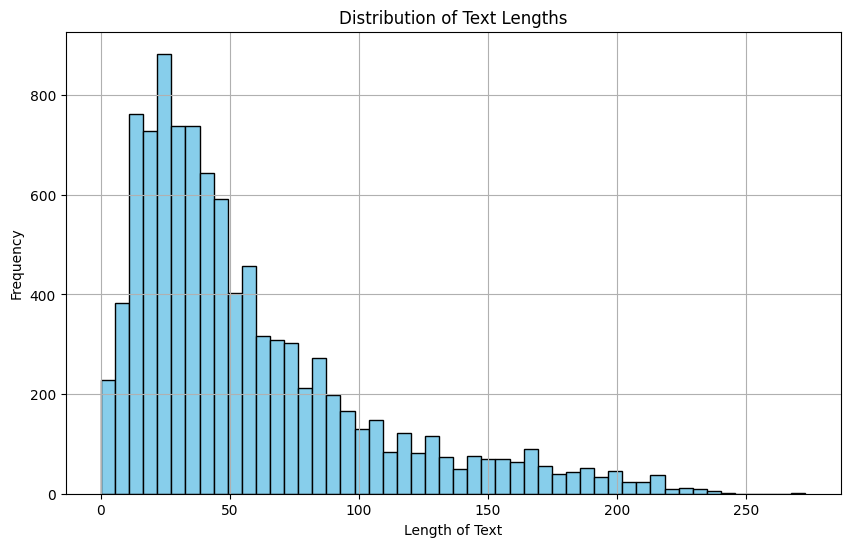

In [37]:
import matplotlib.pyplot as plt

# Assuming df is your DataFrame containing the 'Tweet' column
text_lengths = [len(text) for text in df['Tweet']]

plt.figure(figsize=(10, 6))
plt.hist(text_lengths, bins=50, color='skyblue', edgecolor='black')  # Adjust the number of bins as needed
plt.title('Distribution of Text Lengths')
plt.xlabel('Length of Text')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [38]:
df.head()

,Tweet,Label
0,maleeha chot pay lund patakh patkh maron chup ...,3
1,duniya bahut coronavirus kami reh gayi,1
2,jiska elaaj rabba humein tharkk lagi,1
3,tuj mohabat sakti azyat sakti,1
4,dhhuurrrr bhosari chawal mari imran dally,0


In [39]:
train_df, val_df = train_test_split(df, test_size=0.2, random_state=42)

In [40]:
val_df.reset_index(drop=True, inplace=True)
train_df.reset_index(drop=True, inplace=True)

In [41]:
t_df = pd.read_csv('/kaggle/input/roman/task_2_test.tsv',sep='\t',names=['Tweet','Label'])

In [42]:
t_df.head()

,Tweet,Label
0,bhenchod itna mushkil to nai hona tha zindagi ko,4
1,g g blkl aap ko kya pata 😂😂😂,1
2,khinzeer mullahs .. who cares..,2
3,bhenchod madarchod 🤡,0
4,allah karim ham pe rehm farmaye.,1


In [43]:
len(t_df)

2003

In [44]:
t_df.duplicated().sum()

2

In [45]:
t_df = t_df.drop_duplicates() 

In [46]:
t_df.duplicated().sum()

0

In [47]:
t_df.isnull().sum()

Tweet    0
Label    0
dtype: int64

In [48]:
def remove_URL(text):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'', text)


def remove_emoji(text):
    emoji_pattern = re.compile(
        '['
        u'\U0001F600-\U0001F64F'  # emoticons
        u'\U0001F300-\U0001F5FF'  # symbols & pictographs
        u'\U0001F680-\U0001F6FF'  # transport & map symbols
        u'\U0001F1E0-\U0001F1FF'  # flags (iOS)
        u'\U00002702-\U000027B0'
        u'\U000024C2-\U0001F251'
        ']+',
        flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)


def remove_html(text):
    html = re.compile(r'^[^ ]<.*?>|&([a-z0-9]+|#[0-9]\"\'\“{1,6}|#x[0-9a-f]{1,6});[^A-Za-z0-9]+')
    return re.sub(html, '', text)


def remove_punct(text):
    table = str.maketrans('', '', string.punctuation)
    return text.translate(table)

def remove_quotes(text):
    quotes = re.compile(r'[^A-Za-z0-9\s]+')
    return re.sub(quotes, '', text)


# Applying helper functions

t_df['Tweet'] = t_df['Tweet'].apply(lambda x: remove_URL(x))
t_df['Tweet'] = t_df['Tweet'].apply(lambda x: remove_emoji(x))
t_df['Tweet'] = t_df['Tweet'].apply(lambda x: remove_html(x))
t_df['Tweet'] = t_df['Tweet'].apply(lambda x: remove_punct(x))
t_df['Tweet'] = t_df['Tweet'].apply(lambda x: remove_quotes(x))

In [49]:
t_df.head()

,Tweet,Label
0,bhenchod itna mushkil to nai hona tha zindagi ko,4
1,g g blkl aap ko kya pata,1
2,khinzeer mullahs who cares,2
3,bhenchod madarchod,0
4,allah karim ham pe rehm farmaye,1


In [50]:
val_df.head()

,Tweet,Label
0,weldone bhen,1
1,baray baray begherat dekhe bara begherat bi na...,0
2,jahiliyat v had slave tarh rahti bahar kutto j...,3
3,hahahahahahaha aray bata farmabardar bv kasy b...,1
4,jaa bhen lory harrami nasal dewband maslak kut...,2


In [51]:
train_df.head()

,Tweet,Label
0,bc pics kn bnta,4
1,madam knowledge durust kitne link mene tumko d...,1
2,asim uski image kyu khrab shehnaaz kyu bta,1
3,papers thori chor dain haha,1
4,randi modi maa tatti khane salle reporter,0


In [52]:
w_df = zip(val_df['Tweet'], val_df['Label'])

In [53]:
for (i, (text, label)) in enumerate(w_df):
    if i == 10 :
        print(text)
        print(label)
    

herbal medicine sujan jaati dard ahsaas khatam after lathi charge helps them alot dekhe aapne charsi socks sungte rehte same cheez
1


In [54]:
import logging
import numpy as np
 
from torch.utils.data import TensorDataset, DataLoader, SequentialSampler

logging.basicConfig(format = '%(asctime)s - %(levelname)s - %(name)s - %(message)s',
                    datefmt = '%m/%d/%Y %H:%M:%S',
                    level = logging.INFO)
logger = logging.getLogger(__name__)

MAX_SEQ_LENGTH=100

class BertInputItem(object):
    """An item with all the necessary attributes for finetuning BERT."""

    def __init__(self, text, input_ids, input_mask, segment_ids, label_id):
        self.text = text
        self.input_ids = input_ids
        self.input_mask = input_mask
        self.segment_ids = segment_ids
        self.label_id = label_id
        

def convert_examples_to_inputs(example_texts, example_labels, max_seq_length, tokenizer, verbose=0):
    """Loads a data file into a list of `InputBatch`s."""
    
    input_items = []
    examples = zip(example_texts, example_labels)
    for (ex_index, (text, label)) in enumerate(examples):

        # Create a list of token ids
        input_ids = tokenizer.encode(f"[CLS] {text} [SEP]")
        
        if len(input_ids) > max_seq_length:
            input_ids = input_ids[:max_seq_length]

        # All our tokens are in the first input segment (id 0).
        segment_ids = [0] * len(input_ids)

        # The mask has 1 for real tokens and 0 for padding tokens. Only real
        # tokens are attended to.
        input_mask = [1] * len(input_ids)

        # Zero-pad up to the sequence length.
        padding = [0] * (max_seq_length - len(input_ids))
        input_ids += padding
        input_mask += padding
        segment_ids += padding

        assert len(input_ids) == max_seq_length
        assert len(input_mask) == max_seq_length
        assert len(segment_ids) == max_seq_length

        label_id = label

        input_items.append(
            BertInputItem(text=text,
                          input_ids=input_ids,
                          input_mask=input_mask,
                          segment_ids=segment_ids,
                          label_id=label_id))

        
    return input_items

def get_data_loader(features, max_seq_length, batch_size=8, shuffle=True): 

    all_input_ids = torch.tensor([f.input_ids for f in features], dtype=torch.long)
    all_input_mask = torch.tensor([f.input_mask for f in features], dtype=torch.long)
    all_segment_ids = torch.tensor([f.segment_ids for f in features], dtype=torch.long)
    all_label_ids = torch.tensor([f.label_id for f in features], dtype=torch.long)
    data = TensorDataset(all_input_ids, all_input_mask, all_segment_ids, all_label_ids)

    dataloader = DataLoader(data, shuffle=shuffle, batch_size=batch_size)
    return dataloader



    
train_features = convert_examples_to_inputs(train_df["Tweet"], 
                                                train_df["Label"], 
                                                MAX_SEQ_LENGTH, tokenizer, verbose=0)

dev_features = convert_examples_to_inputs(val_df["Tweet"], 
                                              val_df["Label"], 
                                              MAX_SEQ_LENGTH, tokenizer)

test_features = convert_examples_to_inputs(t_df["Tweet"],
                                               t_df["Label"], 
                                               MAX_SEQ_LENGTH, tokenizer)


    
    

dataloader_train_all = get_data_loader(train_features, MAX_SEQ_LENGTH, shuffle=True)
dataloader_dev_all = get_data_loader(dev_features, MAX_SEQ_LENGTH, shuffle=False)

In [55]:
type(train_features)

list

In [56]:
print(dataloader_train_all)

In [57]:
from tqdm.notebook import tqdm

# def evaluate(model, dataloader, device="cpu"):
#     model.eval()
    
#     eval_loss = 0
#     nb_eval_steps = 0
#     predicted_labels, correct_labels = [], []

#     model.to(device)
#     for step, batch in enumerate(tqdm(dataloader, desc="Evaluation iteration")):
#         batch = tuple(t.to(device) for t in batch)
#         input_ids, input_mask, segment_ids, label_ids = batch

#         with torch.no_grad():
#             tmp_eval_loss, logits = model(input_ids, attention_mask=input_mask,
#                               token_type_ids=segment_ids, labels=label_ids)

#         print(type(logits))
#         print(logits)
#         print(tmp_eval_loss)
#         logits = logits.detach().cpu().numpy()
#         outputs = np.argmax(logits.to('cpu'), axis=1)
#         label_ids = label_ids.to('cpu').numpy()
        
#         predicted_labels += list(outputs)
#         correct_labels += list(label_ids)
        
#         eval_loss += tmp_eval_loss.mean().item()
#         nb_eval_steps += 1

#     eval_loss = eval_loss / nb_eval_steps
    
#     correct_labels = np.array(correct_labels)
#     predicted_labels = np.array(predicted_labels)
        
#     return eval_loss, correct_labels, predicted_labels

In [58]:
import torch

# Assuming the evaluate function and other necessary imports are already defined above.

def evaluate(model, dataloader, device="cpu"):
    model.eval()
    
    eval_loss = 0
    nb_eval_steps = 0
    predicted_labels, correct_labels = [], []

    model.to(device)
    for step, batch in enumerate(tqdm(dataloader, desc="Evaluation iteration")):
        batch = tuple(t.to(device) for t in batch)
        input_ids, input_mask, segment_ids, label_ids = batch

        with torch.no_grad():
            outputs = model(input_ids, attention_mask=input_mask, token_type_ids=segment_ids, labels=label_ids)
            tmp_eval_loss, logits = outputs.loss, outputs.logits

        logits = logits.detach().cpu().numpy()
        label_ids = label_ids.to('cpu').numpy()
        outputs = np.argmax(logits, axis=1)
        
        predicted_labels += list(outputs)
        correct_labels += list(label_ids)
        
        eval_loss += tmp_eval_loss.item()
        nb_eval_steps += 1

    eval_loss = eval_loss / nb_eval_steps
    
    correct_labels = np.array(correct_labels)
    predicted_labels = np.array(predicted_labels)
        
    return eval_loss, correct_labels, predicted_labels



In [59]:
dataloader_test_all = get_data_loader(test_features, MAX_SEQ_LENGTH, shuffle=False)

In [60]:
dataloader_test_all

In [61]:
_, correct_labels, predicted_labels = evaluate(model, dataloader_test_all, device=device)
accuracy = np.mean(predicted_labels == correct_labels)
print(accuracy)

Evaluation iteration:   0%|          | 0/251 [00:00<?, ?it/s]

0.10344827586206896


In [62]:
# import os

# current_directory = os.getcwd()
# print(f"Current Directory: {current_directory}")


In [63]:
o_path = output_model_file = '/kaggle/working/bert_model_unique.pth'

In [64]:
print(o_path)

/kaggle/working/bert_model_unique.pth


In [65]:
# if not os.path.exists(o_path):
#     os.makedirs(o_path)


In [66]:

# # Function to train the model
# def train(model, train_dataloader, dev_dataloader, output_model_file = o_path,
#           num_train_epochs=20, gradient_accumulation_steps=1, max_grad_norm=1.0,
#           warmup_proportion=0.1, batch_size=8, learning_rate=5e-5): 

#     device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
#     model.to(device)

#     num_train_steps = int(len(train_dataloader.dataset) / batch_size / gradient_accumulation_steps * num_train_epochs)
#     num_warmup_steps = int(warmup_proportion * num_train_steps)

#     param_optimizer = list(model.named_parameters())
#     no_decay = ['bias', 'LayerNorm.bias', 'LayerNorm.weight']
#     optimizer_grouped_parameters = [
#         {'params': [p for n, p in param_optimizer if not any(nd in n for nd in no_decay)], 'weight_decay': 0.01},
#         {'params': [p for n, p in param_optimizer if any(nd in n for nd in no_decay)], 'weight_decay': 0.0}
#     ]

#     optimizer = AdamW(optimizer_grouped_parameters, lr=learning_rate, correct_bias=False)
#     scheduler = get_linear_schedule_with_warmup(optimizer, num_warmup_steps=num_warmup_steps, num_training_steps=num_train_steps)
    
#     loss_history = []

#     for epoch in trange(int(num_train_epochs), desc="Epoch"):
#         model.train()
#         tr_loss = 0.0
#         nb_tr_examples, nb_tr_steps = 0, 0

#         for step, batch in enumerate(tqdm(train_dataloader, desc="Training iteration")):
#             batch = tuple(t.to(device) for t in batch)
#             input_ids, input_mask, segment_ids, label_ids = batch

#             outputs = model(input_ids, attention_mask=input_mask, token_type_ids=segment_ids, labels=label_ids)
#             loss = outputs.loss  # Accessing loss from the model's output

#             if gradient_accumulation_steps > 1:
#                 loss = loss / gradient_accumulation_steps

#             loss.backward()

#             tr_loss += loss.item()
#             nb_tr_examples += input_ids.size(0)
#             nb_tr_steps += 1

#             if (step + 1) % gradient_accumulation_steps == 0:
#                 torch.nn.utils.clip_grad_norm_(model.parameters(), max_grad_norm) 
#                 optimizer.step()
#                 optimizer.zero_grad() 
#                 scheduler.step()

#         dev_loss, _, _ = evaluate(model, dev_dataloader, device=device)

#         print(f"Epoch {epoch + 1}/{num_train_epochs} - Training Loss: {tr_loss / nb_tr_steps} - Dev Loss: {dev_loss}")

#         model_to_save = model.module if hasattr(model, 'module') else model
#         try:
#             torch.save(model_to_save.state_dict(), output_model_file)
#             print(f"Model saved to {output_model_file}")
#         except Exception as e:
#             print(f"Error saving model: {e}")

#         loss_history.append(dev_loss)
        
#     return output_model_file

In [67]:
# torch.cuda.empty_cache()
# model = BertForSequenceClassification.from_pretrained(BERT_MODEL, num_labels = 5)
# model.to(device)
# model_file_name = train(model, dataloader_train_all, dataloader_dev_all, 
#                            gradient_accumulation_steps=4)
# _, correct_labels, predicted_labels = evaluate(model, dataloader_test_all, device=device)
# accuracy = np.mean(predicted_labels == correct_labels)
# print(f"Final Zer_shot Accuracy{accuracy}")

In [68]:
o_path = output_model_file = '/kaggle/working/bert_model_unique2.pth'

In [69]:
import torch
import os
from tqdm import trange
from tqdm.notebook import tqdm  # Updated import
from sklearn.metrics import classification_report, precision_recall_fscore_support
from transformers import AdamW, get_linear_schedule_with_warmup

def train(model, train_dataloader, dev_dataloader, output_model_file = o_path,
          num_train_epochs=20, patience=2, gradient_accumulation_steps=1, max_grad_norm=1.0,
          warmup_proportion=0.1, batch_size=8, learning_rate=5e-5): 

    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

    num_train_steps = int(len(train_dataloader.dataset) / batch_size / gradient_accumulation_steps * num_train_epochs)
    num_warmup_steps = int(warmup_proportion * num_train_steps)

    param_optimizer = list(model.named_parameters())
    no_decay = ['bias', 'LayerNorm.bias', 'LayerNorm.weight']
    optimizer_grouped_parameters = [
        {'params': [p for n, p in param_optimizer if not any(nd in n for nd in no_decay)], 'weight_decay': 0.01},
        {'params': [p for n, p in param_optimizer if any(nd in n for nd in no_decay)], 'weight_decay': 0.0}
    ]

    optimizer = AdamW(optimizer_grouped_parameters, lr=learning_rate, correct_bias=False)
    scheduler = get_linear_schedule_with_warmup(optimizer, num_warmup_steps=num_warmup_steps, num_training_steps=num_train_steps)
    
    loss_history = []
    no_improvement = 0

    for epoch in trange(int(num_train_epochs), desc="Epoch"):
        model.train()
        tr_loss = 0.0
        nb_tr_examples, nb_tr_steps = 0, 0

        for step, batch in enumerate(tqdm(train_dataloader, desc="Training iteration")):
            batch = tuple(t.to(device) for t in batch)
            input_ids, input_mask, segment_ids, label_ids = batch

            outputs = model(input_ids, attention_mask=input_mask, token_type_ids=segment_ids, labels=label_ids)
            loss = outputs.loss  # Accessing loss from the model's output

            if gradient_accumulation_steps > 1:
                loss = loss / gradient_accumulation_steps

            loss.backward()

            tr_loss += loss.item()
            nb_tr_examples += input_ids.size(0)
            nb_tr_steps += 1

            if (step + 1) % gradient_accumulation_steps == 0:
                torch.nn.utils.clip_grad_norm_(model.parameters(), max_grad_norm) 
                optimizer.step()
                optimizer.zero_grad() 
                scheduler.step()

        dev_loss, _, _ = evaluate(model, dev_dataloader, device=device)

        print(f"Epoch {epoch + 1}/{num_train_epochs} - Training Loss: {tr_loss / nb_tr_steps} - Dev Loss: {dev_loss}")

        if len(loss_history) == 0 or dev_loss < min(loss_history):
            no_improvement = 0
            model_to_save = model.module if hasattr(model, 'module') else model
            try:
                with open(output_model_file, 'wb') as f:
                    torch.save(model_to_save.state_dict(), f)
                print(f"Model saved to {output_model_file}")
            except Exception as e:
                print(f"Error saving model: {e}")
        else:
            no_improvement += 1
        
        if no_improvement >= patience:
            print("No improvement on development set. Finish training.")
            break

        loss_history.append(dev_loss)
        
    return output_model_file




In [70]:
torch.cuda.empty_cache()
model = BertForSequenceClassification.from_pretrained(BERT_MODEL, num_labels = 5)
model.to(device)
model_file_name = train(model, dataloader_train_all, dataloader_dev_all, 
                           gradient_accumulation_steps=4)
_, correct_labels, predicted_labels = evaluate(model, dataloader_test_all, device=device)
accuracy = np.mean(predicted_labels == correct_labels)
print(f"Final Zer_shot Accuracy{accuracy}")

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-multilingual-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/opt/conda/lib/python3.10/site-packages/transformers/optimization.py:457: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(
Epoch:   0%|          | 0/20 [00:00<?, ?it/s]

Training iteration:   0%|          | 0/990 [00:00<?, ?it/s]

Evaluation iteration:   0%|          | 0/248 [00:00<?, ?it/s]

Epoch 1/20 - Training Loss: 0.2676786232024732 - Dev Loss: 0.6672878863980933


Epoch:   5%|▌         | 1/20 [01:40<31:50, 100.55s/it]

Model saved to /kaggle/working/bert_model_unique2.pth


Training iteration:   0%|          | 0/990 [00:00<?, ?it/s]

Evaluation iteration:   0%|          | 0/248 [00:00<?, ?it/s]

Epoch 2/20 - Training Loss: 0.14769398350494378 - Dev Loss: 0.5348409079766322


Epoch:  10%|█         | 2/20 [03:21<30:15, 100.88s/it]

Model saved to /kaggle/working/bert_model_unique2.pth


Training iteration:   0%|          | 0/990 [00:00<?, ?it/s]

Evaluation iteration:   0%|          | 0/248 [00:00<?, ?it/s]

Epoch 3/20 - Training Loss: 0.08775002542939601 - Dev Loss: 0.45362655970177823


Epoch:  15%|█▌        | 3/20 [05:03<28:40, 101.19s/it]

Model saved to /kaggle/working/bert_model_unique2.pth


Training iteration:   0%|          | 0/990 [00:00<?, ?it/s]

Evaluation iteration:   0%|          | 0/248 [00:00<?, ?it/s]

Epoch 4/20 - Training Loss: 0.049664377899149036 - Dev Loss: 0.37462228637248757


Epoch:  20%|██        | 4/20 [06:44<27:00, 101.31s/it]

Model saved to /kaggle/working/bert_model_unique2.pth


Training iteration:   0%|          | 0/990 [00:00<?, ?it/s]

Evaluation iteration:   0%|          | 0/248 [00:00<?, ?it/s]

Epoch:  25%|██▌       | 5/20 [08:24<25:12, 100.84s/it]

Epoch 5/20 - Training Loss: 0.0321576539963258 - Dev Loss: 0.38084866869687706


Training iteration:   0%|          | 0/990 [00:00<?, ?it/s]

Evaluation iteration:   0%|          | 0/248 [00:00<?, ?it/s]

Epoch:  25%|██▌       | 5/20 [10:04<30:13, 120.92s/it]

Epoch 6/20 - Training Loss: 0.020219102747487894 - Dev Loss: 0.4184436942157317
No improvement on development set. Finish training.


Evaluation iteration:   0%|          | 0/251 [00:00<?, ?it/s]

Final Zer_shot Accuracy0.7301349325337332
